In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits
import matplotlib.pyplot as     plt

from   astropy.table     import Table, join
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   schechter         import schechter
from   SV3.define_sample import define_sample
from   ajs_kcorr         import ajs_kcorr
from   ref_gmr           import one_reference_gmr
from   params            import params

###  Fig. 14 of https://arxiv.org/pdf/1701.06581.pdf

In [4]:
version = 0.2

In [5]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_v{:.1f}.fits'.format(version))
bright_merge_obs

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True,1.0504202,True,1.0120848
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,True,1.0504202,True,1.0099682
212.14293772910978,-2.127708100431868,0.0,0.0,0.0,0.0,39627733927463809,0.9682231030567523,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1464,529,5291464,8649.267828658223,482.3641546970651 .. 28.304609010743402,0.18572600120311122,5.0569333051126286e-05,0,7825,GALAXY,,10,491.2810438387096,524,0,TGT,174.46136,-357.95212,102100,0.007,-0.013,836.0849,0.7045758604118871,20210507,87604,59342.33186133,5241.1284,3.161646,2.7221062,9271.688,5.1619253,7.320931,11833.8,5.418451,9.364234,0.014638815,7.9371

In [6]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_derived_v{:.1f}.fits'.format(version))
derived

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3.9627733927462344e+16,-1.0,1.0,1.0,1.0120848417282104,1.0504201650619507,6557842.902912342,-19.916587874245813,0.7856902434795595,0.7195012659190705,0.2143594626878119,1.3841174714845046e-07,0.9076824937171634
3.962773392746358e+16,-1.0,1.0,1.0,1.0099681615829468,1.0504201650619507,4388413.147925923,-20.738766389614653,0.8390089675629283,0.7640864042155214,0.2941644387905505,4.662134019082909e-08,0.20459370226736165
3.962773392746381e+16,-1.0,1.0,1.0,1.0021929740905762,1.0504201650619507,4455176.688937193,-21.078121125651027,0.8988151303317244,0.8130684548647261,0.330231769511073,3.108707241923161e-08,0.13849840036946298
3.9627733927464616e+16,-1.0,1.0,1.0,1.0001806020736694,1.0504201650619507,84719.66939856742,-19.689694313761,1.0325692740796637,0.8785213630569358,0.19263752841677584,1.985470381287969e-07,0.016820839430336434
3.962773392746479e+16,-1.0,1.0,1.0,1.0094077587127686,1.0504201650619507,15168192.40685058,-20.78261008302364,0.899293817950499,0.8218316345956519,0.29588250478293676,4.568415410798125e-08,0.692946039454073
3.962773392746482e+16,-1.0,1.0,0.0,1.051695466041565,1.0504201650619507,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
3.962773392746541e+16,-1.0,1.0,1.0,1.0092251300811768,1.0504201650619507,13263605.969136443,-20.75817917589253,0.9334649528314611,0.8484168999264025,0.2919526463434159,4.786385749011269e-08,0.6348473459117546
3.962773392746584e+16,-1.0,1.0,1.0,1.0278266668319702,1.0504201650619507,26279255.263864897,-20.98049291878994,0.7231080168748883,0.6748943137875617,0.3295045747933823,3.132935876032486e-08,0.823312216115779
3.962773393165839e+16,-1.0,1.0,1.0,1.002821922302246,1.0504201650619507,1326557.0497325193,-20.228460950007847,0.5482849485932211,0.5161276491652784,0.2998197426243902,4.362442635344268e-08,0.05787029031969649


In [7]:
isin                   = define_sample(bright_merge_obs)

bright_merge_obs       = bright_merge_obs[isin]
derived                = derived[isin]

In [8]:
np.mean(isin)

0.9481779535218652

In [9]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

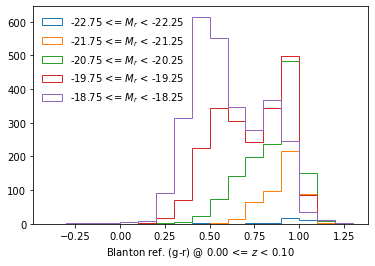

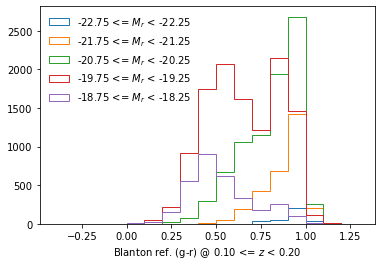

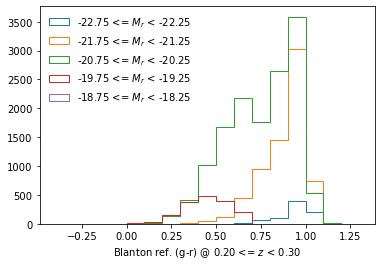

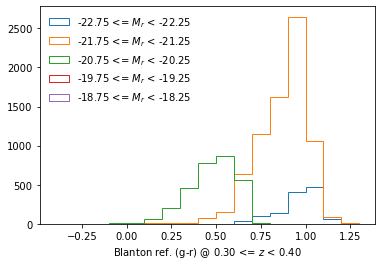

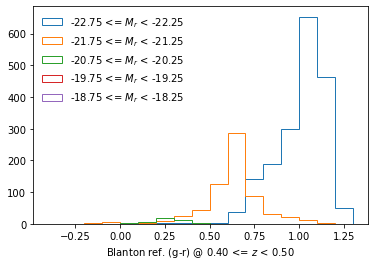

In [10]:
Ms = np.arange(-22.75, -17.75, 1.0)

for i, zcut in enumerate(np.arange(0.0, 0.5, 0.1)):
    in_zcut      = (bright_merge_obs['Z'] >= zcut) & (bright_merge_obs['Z'] < zcut + 0.1)
    zcut_derived =  derived[in_zcut]
    
    for j, (MM, alpha) in enumerate(zip(Ms, np.linspace(0.0, 1.0, len(Ms)))):
        in_Mcut      =  (zcut_derived['MRH'] >= MM) & (zcut_derived['MRH'] < MM +0.5)
        Mcut_derived =   zcut_derived[in_Mcut]

        label='{:.2f} <= {} < {:.2f}'.format(MM, r'$M_r$', MM+0.5)        
        # label+='; <MM>={:.2f}'.format(np.median(Mcut_derived['MRH']))
                                              
        pl.hist(Mcut_derived['REF_GMR0P1'], bins=np.arange(-0.4, 1.4, 0.1), histtype='step', color=colors[j], label=label)
    
    pl.legend(frameon=False, loc=2)
    pl.xlabel('Blanton ref. (g-r) @ {:.2f} <= $z$ < {:.2f}'.format(zcut, zcut + 0.1))
    pl.show()

# Done.